# TASK #1: PROJECT OVERVIEW 


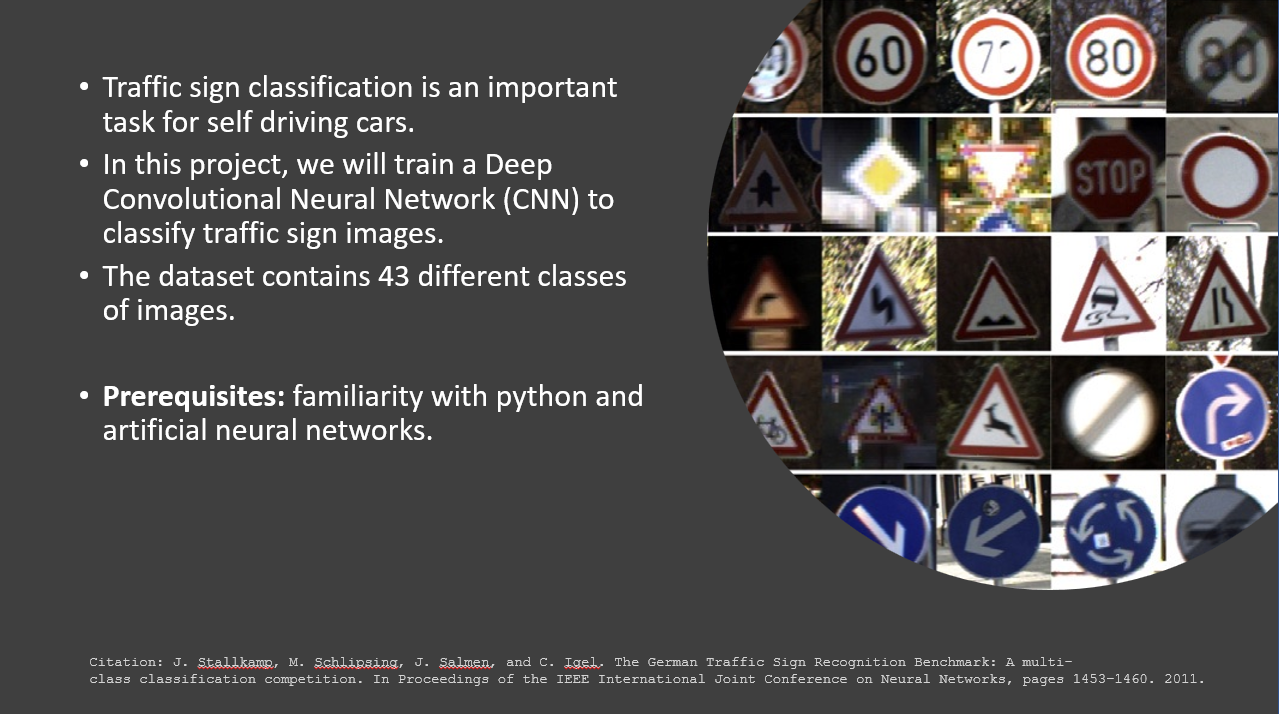

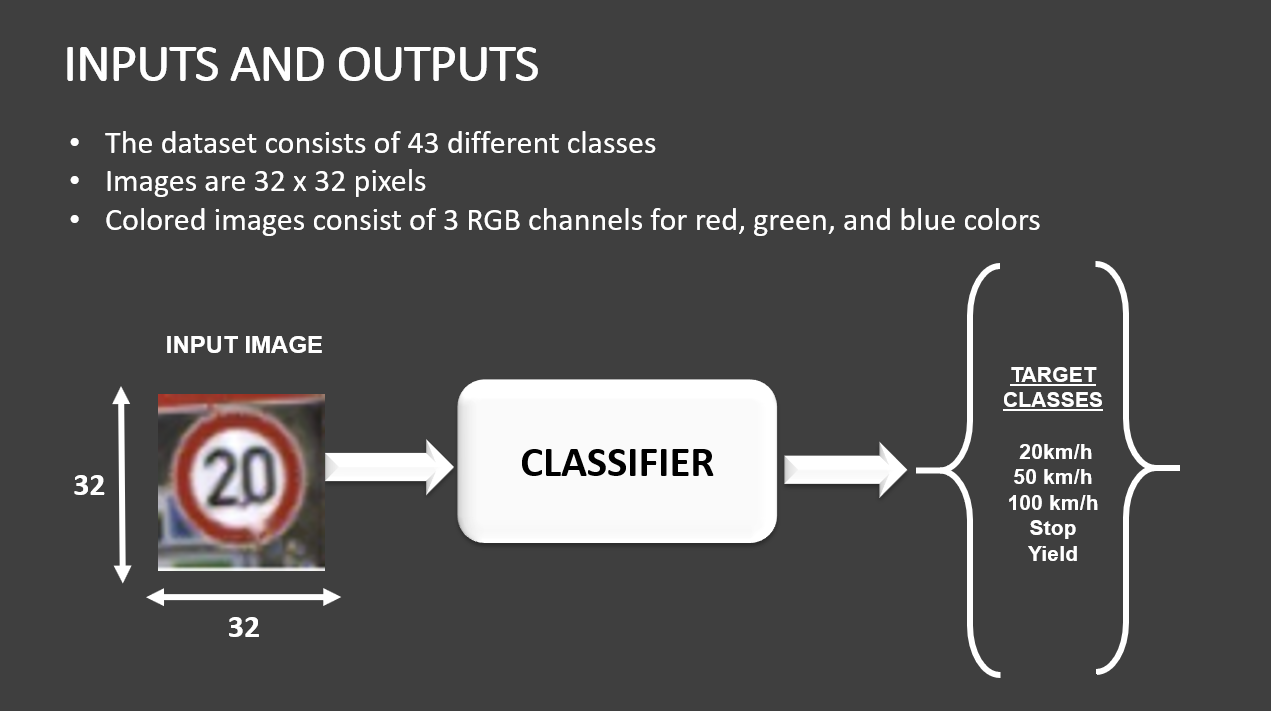

# TASK #2: IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

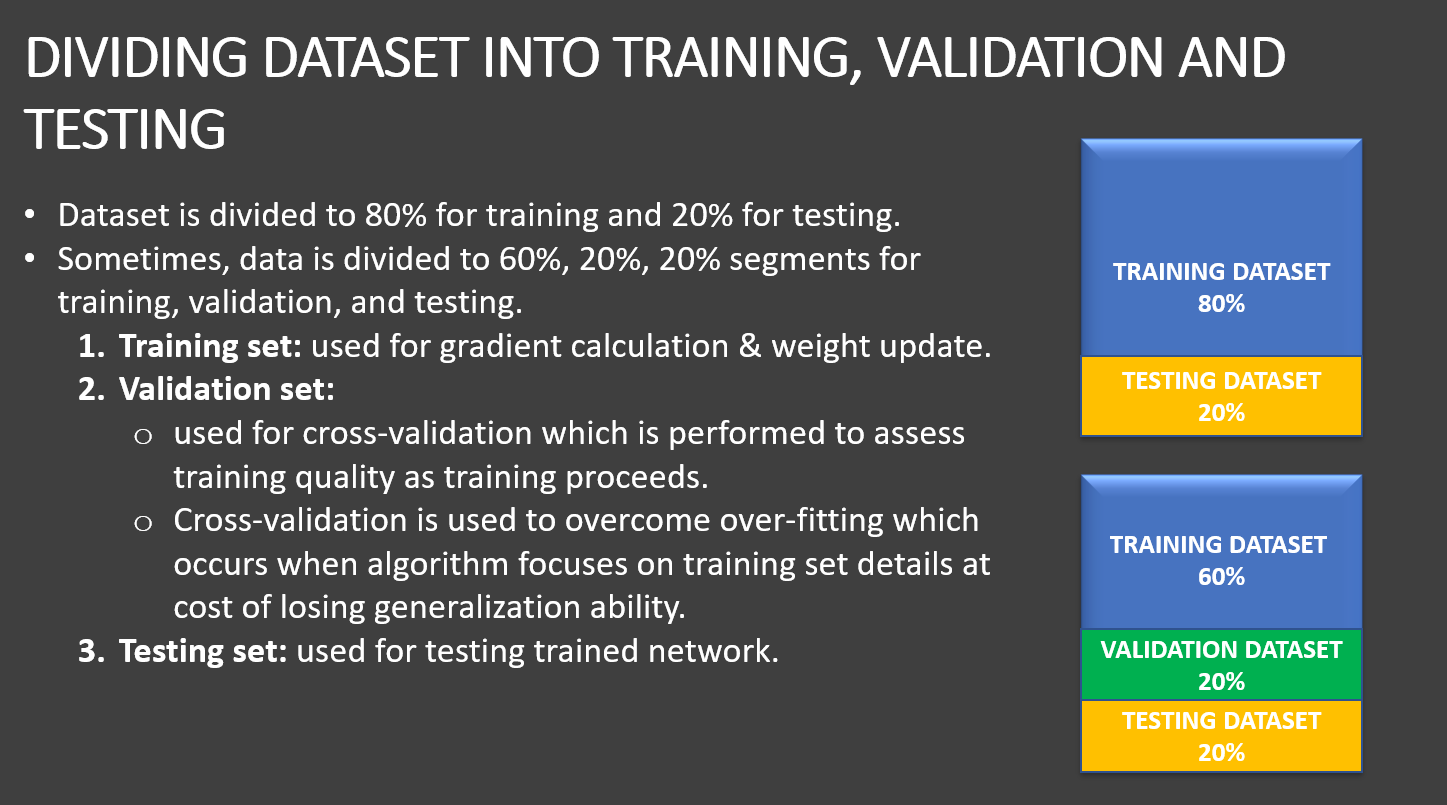

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
x_validation, y_validation=valid['features'], valid['labels']

In [7]:
x_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
x_testing, y_testing=test['features'], test['labels']

In [10]:
x_testing.shape

(12630, 32, 32, 3)

In [11]:
y_testing.shape

(12630,)

# TASK #3: PERFORM IMAGES VISUALIZATION

8

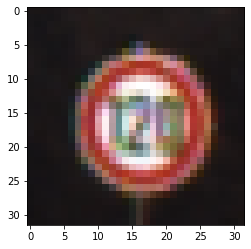

In [12]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

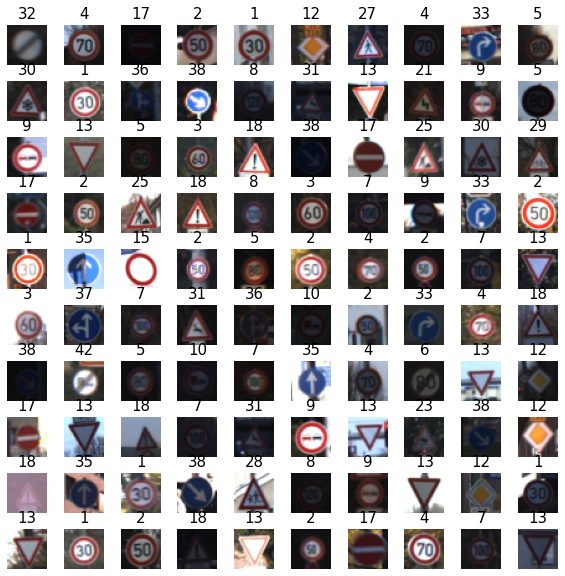

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index=np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace =0.4)

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [16]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [17]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims= True)
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims= True)
x_testing_gray = np.sum(x_testing/3, axis = 3, keepdims= True)

In [18]:
X_train_gray.shape

(34799, 32, 32, 1)

In [19]:
X_train_gray_norm = (X_train_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128
x_testing_gray_norm = (x_testing_gray - 128)/128


In [20]:
X_train_gray_norm 

array([[[[-0.81510417],
         [-0.82552083],
         [-0.81770833],
         ...,
         [-0.671875  ],
         [-0.66666667],
         [-0.6640625 ]],

        [[-0.82552083],
         [-0.82552083],
         [-0.81510417],
         ...,
         [-0.65104167],
         [-0.6640625 ],
         [-0.67708333]],

        [[-0.83333333],
         [-0.828125  ],
         [-0.8046875 ],
         ...,
         [-0.4765625 ],
         [-0.51041667],
         [-0.5703125 ]],

        ...,

        [[-0.73697917],
         [-0.72395833],
         [-0.72395833],
         ...,
         [-0.66927083],
         [-0.671875  ],
         [-0.671875  ]],

        [[-0.73177083],
         [-0.72395833],
         [-0.72135417],
         ...,
         [-0.63802083],
         [-0.64583333],
         [-0.65625   ]],

        [[-0.72916667],
         [-0.72395833],
         [-0.7265625 ],
         ...,
         [-0.63020833],
         [-0.6328125 ],
         [-0.640625  ]]],


       [[[-0.921875  ],


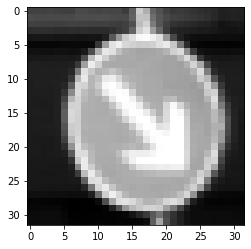

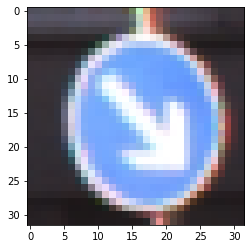

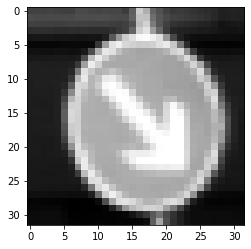

In [21]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [22]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()


CNN.add(layers.Conv2D(6,(5,5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())



CNN.add(layers.Flatten())


CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

# TASK #6: COMPILE AND TRAIN DEEP CNN MODEL

In [23]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [25]:
history = CNN.fit(X_train_gray_norm,
                  y_train,
                  batch_size = 500,
                  epochs = 50,
                  verbose = 1, 
                  validation_data =(x_validation_gray_norm, y_validation) )

Epoch 1/50
70/70 [==============================] - 8s 113ms/step - loss: 0.5727 - accuracy: 0.8336 - val_loss: 0.6325 - val_accuracy: 0.8254
Epoch 2/50
70/70 [==============================] - 9s 128ms/step - loss: 0.4962 - accuracy: 0.8592 - val_loss: 0.5759 - val_accuracy: 0.8460
Epoch 3/50
70/70 [==============================] - 12s 168ms/step - loss: 0.4326 - accuracy: 0.8749 - val_loss: 0.5803 - val_accuracy: 0.8395
Epoch 4/50
70/70 [==============================] - 14s 203ms/step - loss: 0.3956 - accuracy: 0.8869 - val_loss: 0.5466 - val_accuracy: 0.8553
Epoch 5/50
70/70 [==============================] - 12s 177ms/step - loss: 0.3553 - accuracy: 0.9003 - val_loss: 0.5285 - val_accuracy: 0.8687
Epoch 6/50
70/70 [==============================] - 12s 165ms/step - loss: 0.3205 - accuracy: 0.9090 - val_loss: 0.5107 - val_accuracy: 0.8649
Epoch 7/50
70/70 [==============================] - 11s 160ms/step - loss: 0.2936 - accuracy: 0.9157 - val_loss: 0.4862 - val_accuracy: 0.8760
E

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

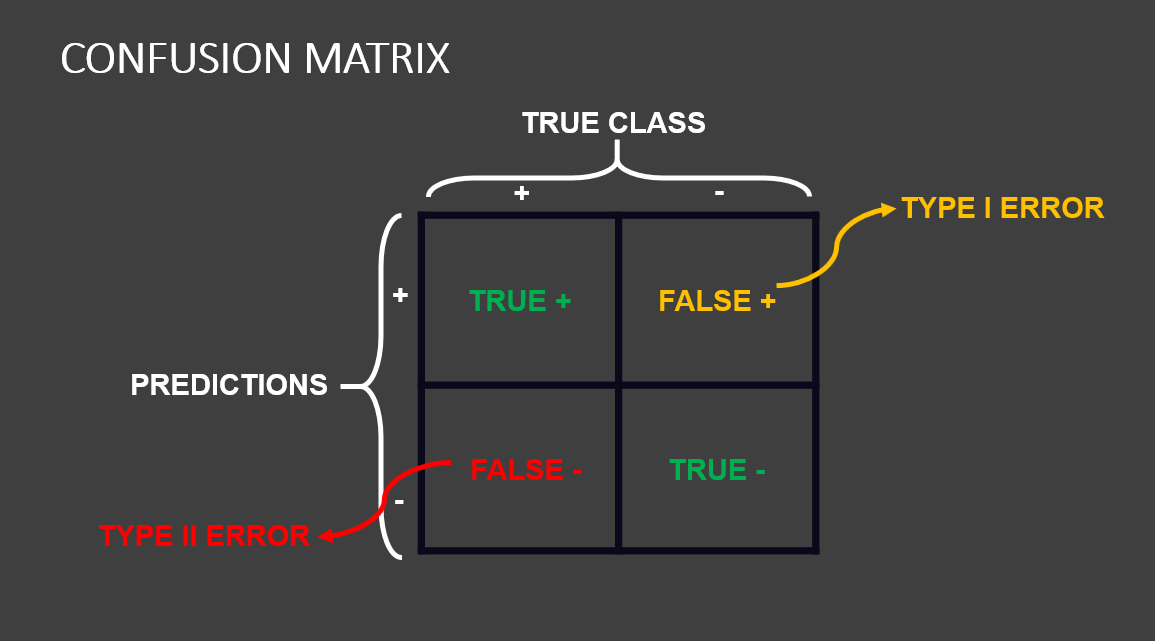

In [32]:
score = CNN.evaluate(x_testing_gray_norm, y_testing)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.6552 - accuracy: 0.9081
Test Accuracy: 0.9080759882926941


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

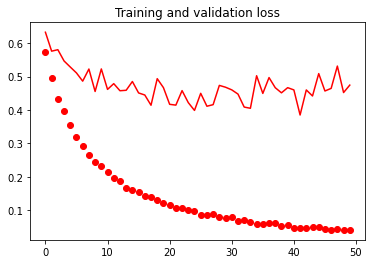

In [31]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

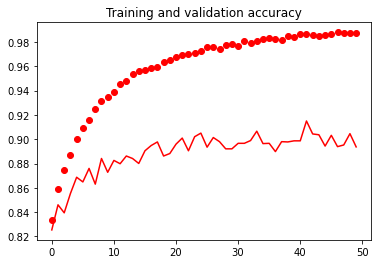

In [33]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


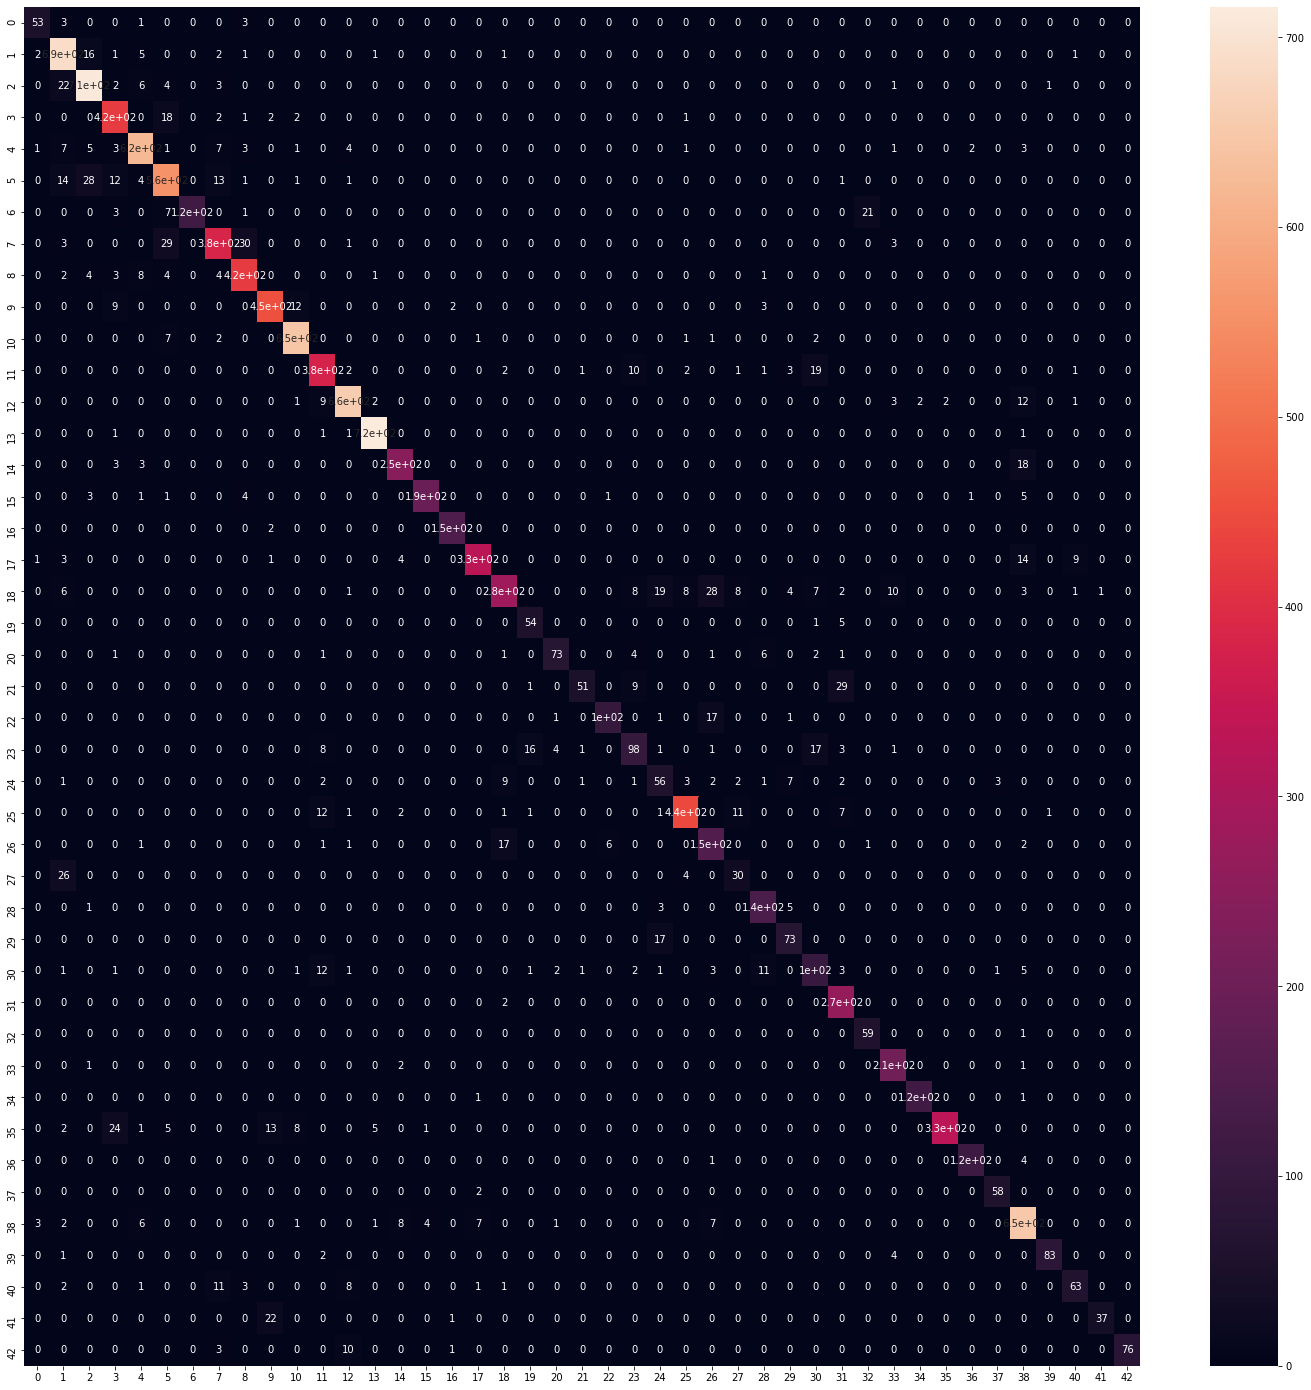

In [34]:
predicted_classes = CNN.predict_classes(x_testing_gray_norm)
y_true = y_testing

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

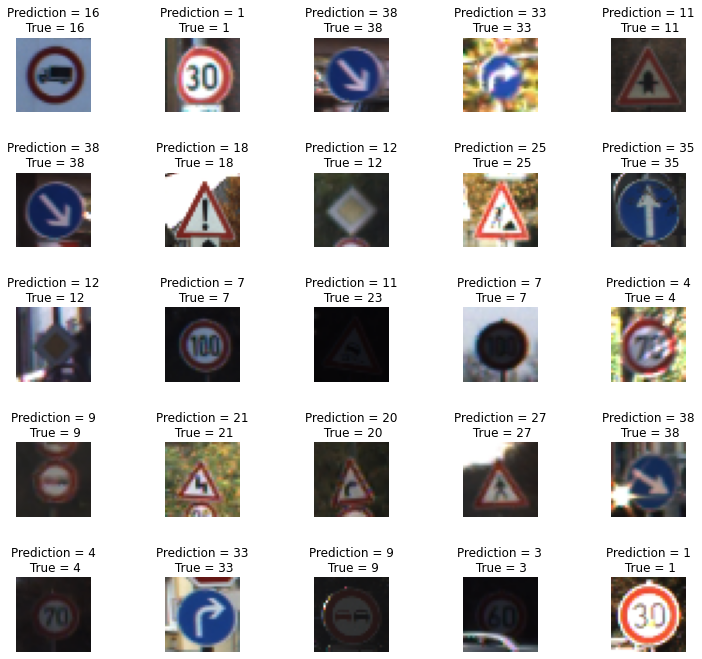

In [36]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_testing[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }